In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
SIMULATION_OUTPUT="/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/development/project"

In [3]:
import pandas as pd
from pathlib import Path
import itertools

In [4]:
#results are in individual files
chunks_list=range(10)
RELATIVE_FILE_PATHS=[f"results/output_lcadc_single_stage_reset_bias_neural_{i}.simplified.vcsv"
                     for i in chunks_list]

In [5]:
filepaths = [Path(SIMULATION_OUTPUT)/filepath for filepath in RELATIVE_FILE_PATHS]
filepaths

[PosixPath('/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/development/project/results/output_lcadc_single_stage_reset_bias_neural_0.simplified.vcsv'),
 PosixPath('/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/development/project/results/output_lcadc_single_stage_reset_bias_neural_1.simplified.vcsv'),
 PosixPath('/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/development/project/results/output_lcadc_single_stage_reset_bias_neural_2.simplified.vcsv'),
 PosixPath('/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/development/project/results/output_lcadc_single_stage_reset_bias_neural_3.simplified.vcsv'),
 PosixPath('/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/development/project/results/output_lcadc_single_stage_reset_bias_neural_4.simplified.vcsv'),
 PosixPath('/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/development/project/results/output_lcadc_single_stage_reset_bias_neural_5.simplified.vcsv'),
 PosixPath('/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/development/project/results/output_lcadc_single_st

In [6]:
def get_df(filepath, header):
    df = pd.read_csv(filepath, comment=';', header=None, 
                 names=header)
    return df[header].copy()

In [7]:
df_list = []
header = ["time", "vout"]
for filepath, chunks in zip(filepaths, chunks_list):
    df_list.append(get_df(filepath,header))
df_list

[           time     vout
 0      0.000000  0.00000
 1      0.000659  0.01875
 2      0.000753  0.00000
 3      0.000853  0.01875
 4      0.000994  0.00000
 ...         ...      ...
 11513  0.998880  0.00000
 11514  0.998942  0.01875
 11515  0.998942  0.00000
 11516  0.999047 -0.01875
 11517  0.999048  0.00000
 
 [11518 rows x 2 columns],
            time     vout
 0      0.000000  0.00000
 1      0.000005 -0.01875
 2      0.000006  0.00000
 3      0.000006 -0.01875
 4      0.000149  0.00000
 ...         ...      ...
 11585  0.999324  0.00000
 11586  0.999575 -0.01875
 11587  0.999575  0.00000
 11588  0.999751 -0.01875
 11589  0.999751  0.00000
 
 [11590 rows x 2 columns],
            time     vout
 0      0.000000  0.00000
 1      0.000005 -0.01875
 2      0.000006  0.00000
 3      0.000006 -0.01875
 4      0.000073  0.00000
 ...         ...      ...
 11364  0.993994  0.03750
 11365  0.994034  0.01875
 11366  0.994099  0.00000
 11367  0.994141  0.01875
 11368  0.994318  0.00000
 
 [11

In [8]:
#come from 7_Export_signals
start_times=[ 0.0,
 0.99915,
 1.999,
 2.9937,
 3.99875,
 4.99575,
 5.9998,
 6.98785,
 8.0024,
 8.99575 ]

end_times=[0.9991,
 0.9998,
 0.99465,
 1.005,
 0.9969500000000004,
 1.0039999999999996,
 0.9880000000000004,
 1.0145,
 0.9932999999999996,
 1.0042000000000009]

In [9]:
rounded_end_times=[round(end_time,5) for end_time in end_times]

In [10]:
def process_df(df,t_start,t_end,delay):
    ndf = df.copy()
    ndf["time"]=ndf["time"]-delay
    ndf["time"]=ndf["time"]+ t_start
    return ndf.loc[(ndf["time"]>=t_start) & (ndf["time"]<t_end)]

In [11]:
import numpy as np

In [12]:
list_df_chunks = []
delay = 6e-6
n_end_times=start_times[1:]+[start_times[-1]+rounded_end_times[-1]]
for i, cdf in enumerate(df_list):
    ndf = process_df(cdf,start_times[i],n_end_times[i],delay)
    list_df_chunks.append(ndf)
list_df_chunks

[           time     vout
 1      0.000653  0.01875
 2      0.000747  0.00000
 3      0.000847  0.01875
 4      0.000988  0.00000
 5      0.001280  0.01875
 ...         ...      ...
 11513  0.998874  0.00000
 11514  0.998936  0.01875
 11515  0.998936  0.00000
 11516  0.999041 -0.01875
 11517  0.999042  0.00000
 
 [11517 rows x 2 columns],
            time     vout
 3      0.999150 -0.01875
 4      0.999293  0.00000
 5      0.999300  0.01875
 6      0.999327  0.00000
 7      0.999501  0.01875
 ...         ...      ...
 11585  1.998468  0.00000
 11586  1.998719 -0.01875
 11587  1.998719  0.00000
 11588  1.998895 -0.01875
 11589  1.998895  0.00000
 
 [11587 rows x 2 columns],
            time     vout
 3      1.999000 -0.01875
 4      1.999067  0.00000
 5      1.999114  0.01875
 6      1.999175  0.00000
 7      1.999521  0.01875
 ...         ...      ...
 11364  2.992988  0.03750
 11365  2.993028  0.01875
 11366  2.993093  0.00000
 11367  2.993135  0.01875
 11368  2.993312  0.00000
 
 [11

In [13]:
rdf = pd.concat(list_df_chunks)

In [36]:
len(rdf)

115567

In [14]:
from eapprocessor.tools.resample import resample, decimate
import matplotlib.pylab as plt

In [15]:
fs = 20e3*128
t_start=np.array(rdf["time"])[0]
t_stop=np.array(rdf["time"])[-1]
x = np.arange(t_start, t_stop, 1/fs)
y = resample(rdf["time"], rdf["vout"],x,1)

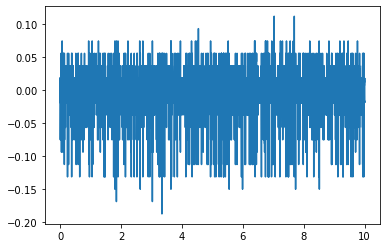

In [16]:
plt.plot(x,y)

In [17]:
d_time,d_signal= decimate(x, y,16)
d_time,d_signal= decimate(d_time, d_signal,8)

In [18]:
import matplotlib.pyplot as plt

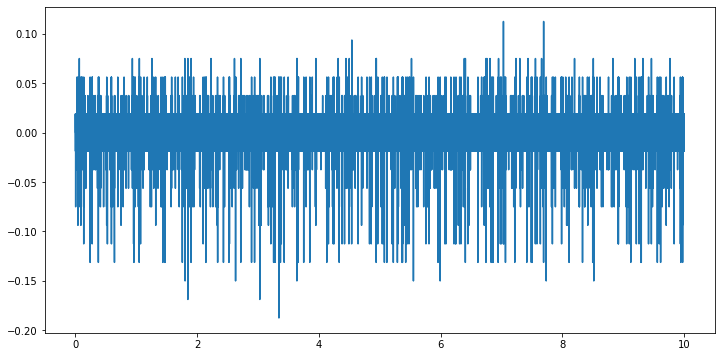

In [19]:
fig= plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1,1,1)
ax.plot(rdf["time"],rdf["vout"])

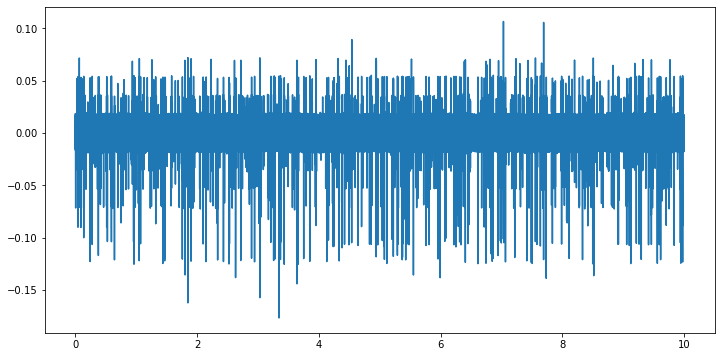

In [20]:
fig= plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1,1,1)
ax.plot(d_time,d_signal[:-1])

In [21]:
BASE_PATH = "/mnt/Data/data"
base_dir = Path(BASE_PATH).resolve()

config = {
    "config_folder": "../data/mearec",
    "recordings_folder": str(base_dir / "output/recordings"),
    "templates_folder": str(base_dir / "output/templates")
}
channel_indexes=[21,27]
fs_list = [24000, 20000, 16000]
noise_levels = [5, 10, 15, 25]
nthresholds = 50

In [22]:
from eapprocessor.mearec.api import generate_templates, generate_recordings, load_recordings

In [23]:
all_recgen_list = [[load_recordings(datafolder=config["recordings_folder"],
                verbose=True, noise_level=noise_level, fs=fs) for noise_level in noise_levels]
               for fs in fs_list]
recordings_20khz = all_recgen_list[1]
recgen=recordings_20khz[0]

Found file /mnt/Data/data/output/recordings/recordings_10cells_Neuronexus-32_10.0_5uV_24000Hz_2021-12-02_10-59.h5
Loading recordings...
Done loading recordings...
Found file /mnt/Data/data/output/recordings/recordings_10cells_Neuronexus-32_10.0_10uV_24000Hz_2021-12-02_11-00.h5
Loading recordings...
Done loading recordings...
Found file /mnt/Data/data/output/recordings/recordings_10cells_Neuronexus-32_10.0_15uV_24000Hz_2021-12-02_11-00.h5
Loading recordings...
Done loading recordings...
Found file /mnt/Data/data/output/recordings/recordings_10cells_Neuronexus-32_10.0_25uV_24000Hz_2021-12-02_11-00.h5
Loading recordings...
Done loading recordings...
Found file /mnt/Data/data/output/recordings/recordings_10cells_Neuronexus-32_10.0_5uV_20000Hz_2021-12-02_11-00.h5
Loading recordings...
Done loading recordings...
Found file /mnt/Data/data/output/recordings/recordings_10cells_Neuronexus-32_10.0_10uV_20000Hz_2021-12-02_11-00.h5
Loading recordings...
Done loading recordings...
Found file /mnt/Da

In [24]:
recordings = recgen.recordings[:].T
timestamps = np.array(recgen.timestamps)

selected = recordings[channel_indexes[1]]
odf = pd.DataFrame({"time":timestamps,"vout":selected})

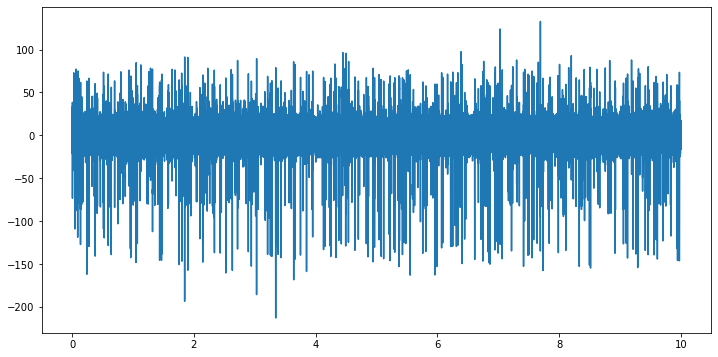

In [25]:
fig= plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1,1,1)
ax.plot(odf["time"],odf["vout"])

In [26]:
from eapprocessor.plot import set_tex_enabled, save_figure
set_tex_enabled(True)

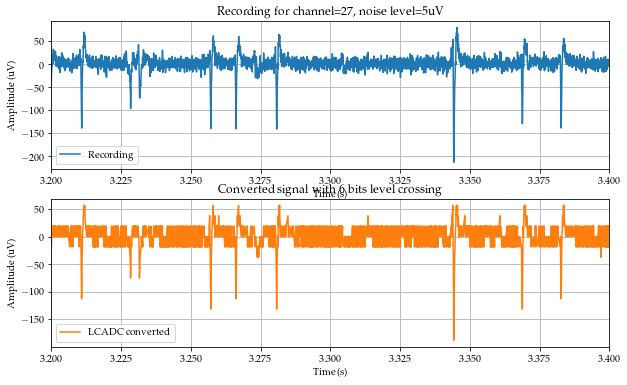

In [27]:
t_start=3.2
t_stop=3.4
channel=channel_indexes[1]
fs=fs_list[1]
noise=noise_levels[0]

scales=[1,1000]
labels=["Recording","LCADC converted"]
titles=[f"Recording for channel={channel}, noise level={noise}uV",
        f"Converted signal with 6 bits level crossing"]
df_list=[odf, rdf]

fig=plt.figure(figsize=(10,6))
for i, cdf, scale, label, title in zip(range(len(df_list)), df_list, scales, labels, titles):
    scope_df=cdf.loc[(cdf["time"]>=t_start)&(cdf["time"]<=t_stop)]
    ax=fig.add_subplot(2,1,i+1)
    ax.plot(scope_df["time"], scope_df["vout"]*scale, f"C{i}",label=label)
    ax.set_xlim([t_start, t_stop])
    ax.grid(True)
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("Amplitude (uV)")
    ax.set_title(title)
    ax.legend(loc="best")

In [28]:
FIGURE_FOLDER = "/mnt/Archivos/Nextcloud/MaestriaPUCP/Thesis/thesis/images"
figure_path = Path(FIGURE_FOLDER)

In [29]:
save_figure(fig, figure_path / "hw_original_converted_lcadc_time.pdf")

In [30]:
from eapprocessor.tools.fft import fft

In [31]:
Fs=20e3

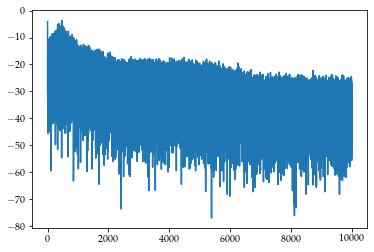

In [32]:
xf, yf = fft(np.array(odf["vout"]), Fs)
plt.plot(xf,10*np.log10(np.power(yf,2)))

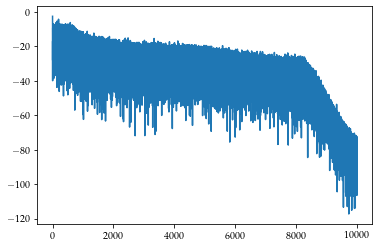

In [33]:
xf1, yf1 = fft(d_signal*1000, Fs)
plt.plot(xf1,10*np.log10(np.power(yf1,2)))

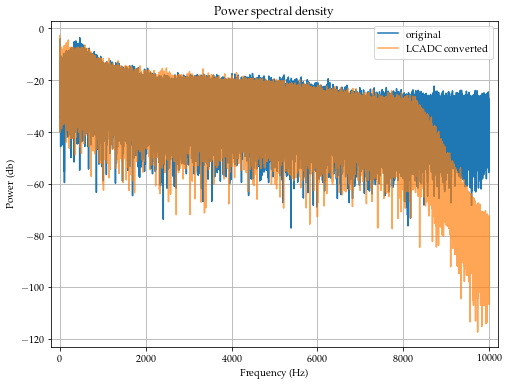

In [34]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)
ax.plot(xf,10*np.log10(np.power(yf,2)), label="original")
ax.plot(xf1,10*np.log10(np.power(yf1,2)), label="LCADC converted",alpha=0.7)
ax.legend()
ax.grid(True)
ax.set_xlim([-Fs/100, max(max(xf),max(xf1)) + Fs/100])
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Power (db)")
ax.set_title("Power spectral density")
ax.legend(loc="best")

In [35]:
save_figure(fig, figure_path / "hw_original_converted_lcadc_frequency.pdf")